In [2]:
import numpy as np
import tensorflow as tf
import pickle as pkl
import matplotlib.pyplot as plt

In [20]:
# utility functions

def plot_eval(history):
    fig, ax = plt.subplots(1, 2, figsize=(24, 8))
    epoch = list(range(1, len(history['loss']) + 1))
    ax[0].plot(epoch, history["loss"], label="training loss")
    ax[0].plot(epoch, history["val_loss"], label="validation loss")
    ax[0].legend()
    ax[1].plot(epoch, history["accuracy"], label="training accuracy")
    ax[1].plot(epoch, history["val_accuracy"], label="validation accuracy")
    ax[1].legend()
    return fig, ax

In [8]:
test = np.loadtxt("handout/test_triplets.txt", dtype=str, delimiter=" ")

In [9]:
with open('features_vg16.pickle', 'rb') as f:
    features_dct = pkl.load(f)

In [6]:
clf_model_path = "models/model_20220425-222537"
cl_model = tf.keras.models.load_model(clf_model_path)
prediction_path = "predictions/prediction_{}.txt".format(clf_model_path.split('_')[-1])
history_path = "train_logs/history_{}.pickle".format(clf_model_path.split('_')[-1])
with open(history_path, 'rb') as f:
    history = pkl.load(f)

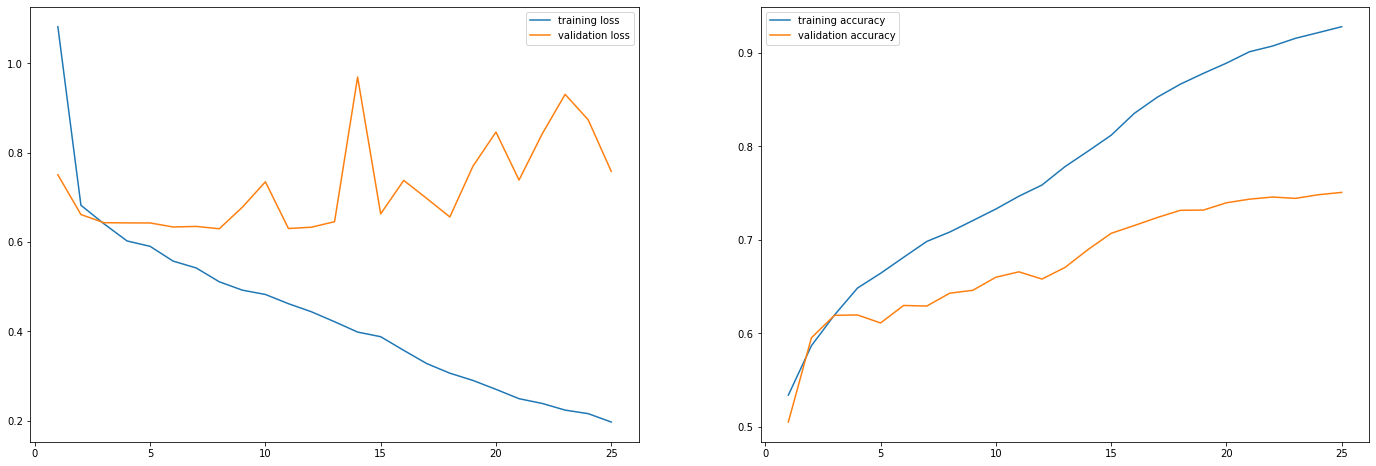

In [21]:
fig, ax = plot_eval(history);

In [22]:
full_rows = []
for row in test:
    full_rows.append(np.hstack([features_dct[n] for n in row]))
test_man = np.vstack(full_rows)

In [23]:
predictions = cl_model.predict(test_man)

2022-04-25 22:33:38.264816: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 17926078464 exceeds 10% of free system memory.
2022-04-25 22:33:49.730089: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-25 22:33:49.730639: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2294660000 Hz


In [24]:
# Write prediction to txt file as column of 0s and 1s
with open(prediction_path, "w") as f:
    for p in predictions:
        if p > 0.5:
            f.write("1")
        else:
            f.write("0")
        f.write("\n")